In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Configure for presentation
#np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

## Drinks

In [2]:
drinks = Table(['Drink', 'Cafe', 'Price']).with_rows([
    ['Milk Tea', 'Panda Tea Lounge', 4],
    ['Espresso', 'Gimme',  2],
    ['Latte',    'Gimme',  3],
    ['Espresso', "Cafe Gola",   2]
])
drinks

Drink    | Cafe             | Price
Milk Tea | Panda Tea Lounge | 4
Espresso | Gimme            | 2
Latte    | Gimme            | 3
Espresso | Cafe Gola        | 2

In [3]:
discounts = Table().with_columns(
    'Coupon % off', make_array(25, 50, 5),
    'Location', make_array('Panda Tea Lounge', 'Gimme', 'Gimme')
)
discounts

Coupon % off | Location
25           | Panda Tea Lounge
50           | Gimme
5            | Gimme

In [4]:
t = drinks.join('Cafe', discounts, 'Location')
t

Cafe             | Drink    | Price | Coupon % off
Gimme            | Espresso | 2     | 50
Gimme            | Espresso | 2     | 5
Gimme            | Latte    | 3     | 50
Gimme            | Latte    | 3     | 5
Panda Tea Lounge | Milk Tea | 4     | 25

In [5]:
t.with_column('Discounted', t.column(2) * (1 - t.column(3)/ 100))

Cafe             | Drink    | Price | Coupon % off | Discounted
Gimme            | Espresso | 2     | 50           | 1
Gimme            | Espresso | 2     | 5            | 1.9
Gimme            | Latte    | 3     | 50           | 1.5
Gimme            | Latte    | 3     | 5            | 2.85
Panda Tea Lounge | Milk Tea | 4     | 25           | 3

In [6]:
two = drinks.join('Cafe', drinks)
two

Cafe             | Drink    | Price | Drink_2  | Price_2
Cafe Gola        | Espresso | 2     | Espresso | 2
Gimme            | Espresso | 2     | Espresso | 2
Gimme            | Espresso | 2     | Latte    | 3
Gimme            | Latte    | 3     | Espresso | 2
Gimme            | Latte    | 3     | Latte    | 3
Panda Tea Lounge | Milk Tea | 4     | Milk Tea | 4

In [7]:
two.with_column('Total', two.column('Price') + two.column('Price_2'))

Cafe             | Drink    | Price | Drink_2  | Price_2 | Total
Cafe Gola        | Espresso | 2     | Espresso | 2       | 4
Gimme            | Espresso | 2     | Espresso | 2       | 4
Gimme            | Espresso | 2     | Latte    | 3       | 5
Gimme            | Latte    | 3     | Espresso | 2       | 5
Gimme            | Latte    | 3     | Latte    | 3       | 6
Panda Tea Lounge | Milk Tea | 4     | Milk Tea | 4       | 8

## Bikes

In [8]:
citi = Table.read_table('citibike_nyc_201707_250000.csv')
citi

tripduration | starttime           | stoptime            | start station id | start station name             | start station latitude | start station longitude | end station id | end station name         | end station latitude | end station longitude | bikeid | usertype   | birth year | gender
364          | 2017-07-01 00:00:00 | 2017-07-01 00:06:05 | 539              | Metropolitan Ave & Bedford Ave | 40.7153                | -73.9602                | 3107           | Bedford Ave & Nassau Ave | 40.7231              | -73.9521              | 14744  | Subscriber | 1986       | 1
2142         | 2017-07-01 00:00:03 | 2017-07-01 00:35:46 | 293              | Lafayette St & E 8 St          | 40.7302                | -73.991                 | 3425           | 2 Ave  & E 104 St        | 40.7892              | -73.9437              | 19587  | Subscriber | 1981       | 1
328          | 2017-07-01 00:00:08 | 2017-07-01 00:05:37 | 3242             | Schermerhorn St & Court St     | 40.691                 | -73.9918                | 3397           | Court St & Nelson St     | 40.6764              | -73.9987              | 27937  | Subscriber | 1984       | 2
2530         | 2017-07-01 00:00:11 | 2017-07-01 00:42:22 | 2002             | Wythe Ave & Metropolitan Ave   | 40.7169                | -73.9632                | 398            | Atlantic Ave & Furman St | 40.6917              | -74                   | 26066  | Subscriber | 1985       | 1
2534         | 2017-07-01 00:00:15 | 2017-07-01 00:42:29 | 2002             | Wythe Ave & Metropolitan Ave   | 40.7169                | -73.9632                | 398            | Atlantic Ave & Furman St | 40.6917              | -74                   | 29408  | Subscriber | 1982       | 2
545          | 2017-07-01 00:00:18 | 2017-07-01 00:09:24 | 361              | Allen St & Hester St           | 40.7161                | -73.9919                | 502            | Henry St & Grand St      | 40.7142              | -73.9813              | 21203  | Subscriber | 1954       | 2
1496         | 2017-07-01 00:00:18 | 2017-07-01 00:25:15 | 3233             | E 48 St & 5 Ave                | 40.7572                | -73.9781                | 546            | E 30 St & Park Ave S     | 40.7444              | -73.983               | 15933  | Customer   | 1971       | 1
1495         | 2017-07-01 00:00:19 | 2017-07-01 00:25:15 | 3233             | E 48 St & 5 Ave                | 40.7572                | -73.9781                | 546            | E 30 St & Park Ave S     | 40.7444              | -73.983               | 18515  | Customer   | 1964       | 2
593          | 2017-07-01 00:00:27 | 2017-07-01 00:10:20 | 3314             | W 95 St & Broadway             | 40.7938                | -73.9719                | 3363           | E 102 St & Park Ave      | 40.7905              | -73.9503              | 29135  | Subscriber | 1982       | 1
1950         | 2017-07-01 00:00:30 | 2017-07-01 00:33:00 | 3085             | Roebling St & N 4 St           | 40.7147                | -73.9574                | 468            | Broadway & W 56 St       | 40.7653              | -73.9819              | 17365  | Subscriber | 1983       | 1
... (249990 rows omitted)

In [9]:
trips = citi.relabeled("start station name", "start")\
            .relabeled("end station name", "end")\
            .select("start", "end")\
            .with_column("duration", citi.column("tripduration")/60)
trips

start                          | end                      | duration
Metropolitan Ave & Bedford Ave | Bedford Ave & Nassau Ave | 6.06667
Lafayette St & E 8 St          | 2 Ave  & E 104 St        | 35.7
Schermerhorn St & Court St     | Court St & Nelson St     | 5.46667
Wythe Ave & Metropolitan Ave   | Atlantic Ave & Furman St | 42.1667
Wythe Ave & Metropolitan Ave   | Atlantic Ave & Furman St | 42.2333
Allen St & Hester St           | Henry St & Grand St      | 9.08333
E 48 St & 5 Ave                | E 30 St & Park Ave S     | 24.9333
E 48 St & 5 Ave                | E 30 St & Park Ave S     | 24.9167
W 95 St & Broadway             | E 102 St & Park Ave      | 9.88333
Roebling St & N 4 St           | Broadway & W 56 St       | 32.5
... (249990 rows omitted)

How long do people generally borrow a bike for?

C:\Users\dw36\Anaconda3\lib\site-packages\datascience\tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


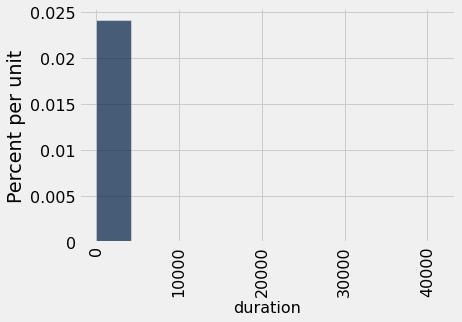

In [10]:
trips.hist("duration")

In [11]:
longest = trips.column("duration").max()
print("Longest trip took", longest/60, "hours.")

Longest trip took 688.1172222222223 hours.


Citibike charges an extra $2.50 for rides longer than 45 minutes

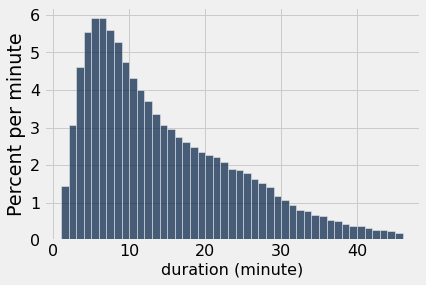

In [12]:
commute = trips.where('duration', are.below(46))
commute.hist('duration', bins=45, unit='minute')

Where did people pick up bikes?

In [13]:
starts = commute.group('start').sort('count', descending=True)
starts

start                             | count
12 Ave & W 40 St                  | 2207
West St & Chambers St             | 2186
Pershing Square North             | 1711
Centre St & Chambers St           | 1494
Central Park S & 6 Ave            | 1466
E 17 St & Broadway                | 1450
W 20 St & 11 Ave                  | 1416
South End Ave & Liberty St        | 1360
Grand Army Plaza & Central Park S | 1330
Pier 40 - Hudson River Park       | 1322
... (604 rows omitted)

* West St & Chambers St is near Stuyvesant High School, Borough of Manhattan Community College, and another ferry terminal, on the Hudson greenway bike trail
* 12 Ave & W 40 St is a ferry terminal on the Hudson greenway bike trail
* Pershing Square North is across from Grand Central Station

In [14]:
commute.pivot('start', 'end')

C:\Users\dw36\Anaconda3\lib\site-packages\datascience\tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


end               | 1 Ave & E 16 St | 1 Ave & E 18 St | 1 Ave & E 30 St | 1 Ave & E 44 St | 1 Ave & E 62 St | 1 Ave & E 68 St | 1 Ave & E 78 St | 1 Ave & E 94 St | 1 Pl & Clinton St | 10 Hudson Yards | 10 St & 5 Ave | 10 St & 7 Ave | 11 Ave & W 27 St | 11 Ave & W 41 St | 11 Ave & W 59 St | 12 Ave & W 40 St | 12 St & 4 Ave | 14 St & 5 Ave | 14 St & 7 Ave | 2 Ave  & E 104 St | 2 Ave & 9 St | 2 Ave & E 31 St | 2 Ave & E 96 St | 2 Ave & E 99 St | 21 St & 43 Ave | 21 St & Queens Plaza North | 3 Ave & 14 St | 3 Ave & E 100 St | 3 Ave & E 62 St | 3 Ave & E 71 St | 3 Ave & E 72 St | 3 St & 3 Ave | 3 St & 7 Ave | 3 St & Hoyt St | 3 St & Prospect Park West | 31 St & Thomson Ave | 4 Ave & 2 St | 4 Ave & 9 St | 44 Dr & Jackson Ave | 45 Rd & 11 St | 46 Ave & 5 St | 47 Ave & 31 St | 48 Ave & 5 St | 5 Ave & 3 St | 5 Ave & E 103 St | 5 Ave & E 29 St | 5 Ave & E 63 St | 5 Ave & E 73 St | 5 Ave & E 78 St | 5 Ave & E 88 St | 5 Ave & E 93 St | 5 St & 6 Ave | 6 Ave & 12 St | 6 Ave & 9 St | 6 Ave & Canal St | 6 Ave & Spring St | 6 Ave & W 33 St | 6 St & 7 Ave | 7 Ave & Park Pl | 7 St & 3 Ave | 7 St & 5 Ave | 8 Ave & W 16 St | 8 Ave & W 31 St | 8 Ave & W 33 St | 8 Ave & W 52 St | 9 Ave & W 18 St | 9 Ave & W 22 St | 9 Ave & W 28 St | 9 Ave & W 45 St | 9 St & 44 Rd | Adelphi St & Myrtle Ave | Albany Ave & Fulton St | Allen St & Hester St | Allen St & Rivington St | Allen St & Stanton St | Amsterdam Ave & W 66 St | Amsterdam Ave & W 73 St | Amsterdam Ave & W 79 St | Amsterdam Ave & W 82 St | Atlantic Ave & Fort Greene Pl | Atlantic Ave & Furman St | Avenue D & E 12 St | Avenue D & E 3 St | Avenue D & E 8 St | Baltic St & 5 Ave | Bank St & Hudson St | Bank St & Washington St | Banker St & Meserole Ave | Barclay St & Church St | Barrow St & Hudson St | Bayard St & Baxter St | Bayard St & Leonard St | Bedford Ave & Nassau Ave | Bedford Ave & S 9 St | Bergen St & Flatbush Ave | Bergen St & Smith St | Berkeley Pl & 6 Ave | Berkeley Pl & 7 Ave | Berry St & N 8 St | Bialystoker Pl & Delancey St | Boerum St & Broadway | Bond St & Bergen St | Bond St & Fulton St | Bond St & Schermerhorn St | Broad St & Bridge St | Broadway & Battery Pl | Broadway & Berry St | Broadway & E 14 St | Broadway & E 22 St | Broadway & Roebling St | Broadway & W 24 St | Broadway & W 29 St | Broadway & W 32 St | Broadway & W 36 St | Broadway & W 41 St | Broadway & W 49 St | Broadway & W 51 St | Broadway & W 53 St | Broadway & W 56 St | Broadway & W 58 St | Broadway & W 60 St | Broadway & Whipple St | Brooklyn Bridge Park - Pier 2 | Bus Slip & State St | Bushwick Ave & Powers St | Butler St & Court St | Cadman Plaza E & Red Cross Pl | Cadman Plaza E & Tillary St | Cadman Plaza West & Montague St | Cambridge Pl & Gates Ave | Carlton Ave & Flushing Ave | Carlton Ave & Park Ave | Carmine St & 6 Ave | Carroll St & 5 Ave | Carroll St & 6 Ave | Carroll St & Bond St | Carroll St & Columbia St | Carroll St & Smith St | Cathedral Pkwy & Broadway | Catherine St & Monroe St | Center Blvd & Borden Ave | Central Park North & Adam Clayton Powell Blvd | Central Park S & 6 Ave | Central Park W & W 96 St | Central Park West & W 100 St | Central Park West & W 102 St | Central Park West & W 68 St | Central Park West & W 72 St | Central Park West & W 76 St | Central Park West & W 85 St | Centre St & Chambers St | Centre St & Worth St | Cherry St | Christopher St & Greenwich St | Clark St & Henry St | Clermont Ave & Lafayette Ave | Clermont Ave & Park Ave | Cleveland Pl & Spring St | Cliff St & Fulton St | Clinton Ave & Flushing Ave | Clinton Ave & Myrtle Ave | Clinton St & 4 Place | Clinton St & Centre St | Clinton St & Grand St | Clinton St & Joralemon St | Clinton St & Tillary St | Clinton St & Union St | Coffey St & Conover St | Columbia Heights & Cranberry St | Columbia St & Degraw St | Columbia St & Kane St | Columbia St & Lorraine St | Columbia St & Rivington St | Columbia St & W 9 St | Columbus Ave & W 103 St | Columbus Ave & W 72 St | Columbus Ave & W 95 St | Commerce St & Van Brunt St | Concord St 

In [15]:
shortest = commute.groups(["start", "end"], min)
shortest

start           | end              | duration min
1 Ave & E 16 St | 1 Ave & E 16 St  | 1.46667
1 Ave & E 16 St | 1 Ave & E 18 St  | 1.1
1 Ave & E 16 St | 1 Ave & E 30 St  | 4.13333
1 Ave & E 16 St | 1 Ave & E 44 St  | 8.41667
1 Ave & E 16 St | 1 Ave & E 62 St  | 14.2167
1 Ave & E 16 St | 1 Ave & E 68 St  | 11.2333
1 Ave & E 16 St | 1 Ave & E 78 St  | 19.8333
1 Ave & E 16 St | 10 Hudson Yards  | 16.3167
1 Ave & E 16 St | 11 Ave & W 41 St | 23.1833
1 Ave & E 16 St | 12 Ave & W 40 St | 17.65
... (73619 rows omitted)

Which stations can you get to fastest from Grand Central Station ('Pershing Square North')?

In [16]:
from_gc = shortest.where("start", are.containing('Pershing Square North')).sort(2)
from_gc

start                 | end                   | duration min
Pershing Square North | Pershing Square North | 1.15
Pershing Square North | E 41 St & Madison Ave | 1.25
Pershing Square North | Pershing Square South | 1.76667
Pershing Square North | E 40 St & 5 Ave       | 1.95
Pershing Square North | E 39 St & 3 Ave       | 2.06667
Pershing Square North | W 43 St & 6 Ave       | 2.46667
Pershing Square North | E 35 St & 3 Ave       | 2.8
Pershing Square North | E 32 St & Park Ave    | 2.81667
Pershing Square North | W 37 St & 5 Ave       | 2.88333
Pershing Square North | E 44 St & 2 Ave       | 3.03333
... (290 rows omitted)

## Maps

In [17]:
stations = citi.relabeled("start station name", "name")\
                .relabeled("start station latitude", "lat")\
                .relabeled("start station longitude", "lon")\
                .select("name", "lat", "lon")
stations

name                           | lat     | lon
Metropolitan Ave & Bedford Ave | 40.7153 | -73.9602
Lafayette St & E 8 St          | 40.7302 | -73.991
Schermerhorn St & Court St     | 40.691  | -73.9918
Wythe Ave & Metropolitan Ave   | 40.7169 | -73.9632
Wythe Ave & Metropolitan Ave   | 40.7169 | -73.9632
Allen St & Hester St           | 40.7161 | -73.9919
E 48 St & 5 Ave                | 40.7572 | -73.9781
E 48 St & 5 Ave                | 40.7572 | -73.9781
W 95 St & Broadway             | 40.7938 | -73.9719
Roebling St & N 4 St           | 40.7147 | -73.9574
... (249990 rows omitted)

How many trips started at each station?

In [18]:
unique_stations = stations.groups(["name", "lat", "lon"])
unique_stations

name              | lat     | lon      | count
1 Ave & E 16 St   | 40.7322 | -73.9817 | 1012
1 Ave & E 18 St   | 40.7338 | -73.9805 | 786
1 Ave & E 30 St   | 40.7414 | -73.9754 | 617
1 Ave & E 44 St   | 40.75   | -73.9691 | 474
1 Ave & E 62 St   | 40.7612 | -73.9609 | 698
1 Ave & E 68 St   | 40.765  | -73.9582 | 744
1 Ave & E 78 St   | 40.7714 | -73.9535 | 674
1 Ave & E 94 St   | 40.7817 | -73.9459 | 188
1 Pl & Clinton St | 40.681  | -73.9991 | 119
10 Hudson Yards   | 40.753  | -74.0026 | 19
... (604 rows omitted)

Map it!

In [19]:
Marker.map_table(unique_stations.select("lat", "lon", "name").relabeled('name', 'labels'))

In [20]:
Circle.map_table(unique_stations.select("lat", "lon", "name").relabeled('name', 'labels'), 
                 color='blue', area=50, fill_opacity=1, line_color='blue')

In [22]:
blue_stations = unique_stations.with_columns(
    "color", np.full(unique_stations.num_rows, "blue"),
    "area", unique_stations.column("count"))
blue_stations

name              | lat     | lon      | count | color | area
1 Ave & E 16 St   | 40.7322 | -73.9817 | 1012  | blue  | 1012
1 Ave & E 18 St   | 40.7338 | -73.9805 | 786   | blue  | 786
1 Ave & E 30 St   | 40.7414 | -73.9754 | 617   | blue  | 617
1 Ave & E 44 St   | 40.75   | -73.9691 | 474   | blue  | 474
1 Ave & E 62 St   | 40.7612 | -73.9609 | 698   | blue  | 698
1 Ave & E 68 St   | 40.765  | -73.9582 | 744   | blue  | 744
1 Ave & E 78 St   | 40.7714 | -73.9535 | 674   | blue  | 674
1 Ave & E 94 St   | 40.7817 | -73.9459 | 188   | blue  | 188
1 Pl & Clinton St | 40.681  | -73.9991 | 119   | blue  | 119
10 Hudson Yards   | 40.753  | -74.0026 | 19    | blue  | 19
... (604 rows omitted)

In [23]:
Circle.map_table(blue_stations.select("lat", "lon", "name", "color", "area").relabeled('name', 'labels'), 
                 line_color='blue', fill_opacity=.5)

How long does it take to get to any other station from grand central?

In [24]:
from_gc

start                 | end                   | duration min
Pershing Square North | Pershing Square North | 1.15
Pershing Square North | E 41 St & Madison Ave | 1.25
Pershing Square North | Pershing Square South | 1.76667
Pershing Square North | E 40 St & 5 Ave       | 1.95
Pershing Square North | E 39 St & 3 Ave       | 2.06667
Pershing Square North | W 43 St & 6 Ave       | 2.46667
Pershing Square North | E 35 St & 3 Ave       | 2.8
Pershing Square North | E 32 St & Park Ave    | 2.81667
Pershing Square North | W 37 St & 5 Ave       | 2.88333
Pershing Square North | E 44 St & 2 Ave       | 3.03333
... (290 rows omitted)

In [25]:
gc_dest = from_gc.join("end", unique_stations, "name")
gc_dest

end              | start                 | duration min | lat     | lon      | count
1 Ave & E 16 St  | Pershing Square North | 10.3167      | 40.7322 | -73.9817 | 1012
1 Ave & E 18 St  | Pershing Square North | 11.6833      | 40.7338 | -73.9805 | 786
1 Ave & E 30 St  | Pershing Square North | 5.96667      | 40.7414 | -73.9754 | 617
1 Ave & E 44 St  | Pershing Square North | 4.8          | 40.75   | -73.9691 | 474
1 Ave & E 62 St  | Pershing Square North | 8.93333      | 40.7612 | -73.9609 | 698
1 Ave & E 68 St  | Pershing Square North | 10.1167      | 40.765  | -73.9582 | 744
1 Ave & E 78 St  | Pershing Square North | 12.85        | 40.7714 | -73.9535 | 674
11 Ave & W 27 St | Pershing Square North | 13.5667      | 40.7514 | -74.0052 | 916
11 Ave & W 41 St | Pershing Square North | 7.95         | 40.7603 | -73.9988 | 767
11 Ave & W 59 St | Pershing Square North | 12.3833      | 40.7715 | -73.9905 | 695
... (290 rows omitted)

In [28]:
color_from_gc = gc_dest.with_columns(
    "color", np.full(gc_dest.num_rows, "blue"),
    "area", 20*gc_dest.column("duration min"))
color_from_gc

end              | start                 | duration min | lat     | lon      | count | color | area
1 Ave & E 16 St  | Pershing Square North | 10.3167      | 40.7322 | -73.9817 | 1012  | blue  | 206.333
1 Ave & E 18 St  | Pershing Square North | 11.6833      | 40.7338 | -73.9805 | 786   | blue  | 233.667
1 Ave & E 30 St  | Pershing Square North | 5.96667      | 40.7414 | -73.9754 | 617   | blue  | 119.333
1 Ave & E 44 St  | Pershing Square North | 4.8          | 40.75   | -73.9691 | 474   | blue  | 96
1 Ave & E 62 St  | Pershing Square North | 8.93333      | 40.7612 | -73.9609 | 698   | blue  | 178.667
1 Ave & E 68 St  | Pershing Square North | 10.1167      | 40.765  | -73.9582 | 744   | blue  | 202.333
1 Ave & E 78 St  | Pershing Square North | 12.85        | 40.7714 | -73.9535 | 674   | blue  | 257
11 Ave & W 27 St | Pershing Square North | 13.5667      | 40.7514 | -74.0052 | 916   | blue  | 271.333
11 Ave & W 41 St | Pershing Square North | 7.95         | 40.7603 | -73.9988 | 767   | blue  | 159
11 Ave & W 59 St | Pershing Square North | 12.3833      | 40.7715 | -73.9905 | 695   | blue  | 247.667
... (290 rows omitted)

In [29]:
Circle.map_table(color_from_gc.select("lat", "lon", "end", "color", "area").relabeled('end', 'labels'),
                 fill_opacity=.6, line_color='blue')

About how long do people spend on trips from each station?

In [30]:
stations = citi.relabeled("start station name", "name")\
                .relabeled("start station latitude", "lat")\
                .relabeled("start station longitude", "lon")\
                .select("name", "lat", "lon")\
                .with_column("duration", citi.column("tripduration")/60)
stations

name                           | lat     | lon      | duration
Metropolitan Ave & Bedford Ave | 40.7153 | -73.9602 | 6.06667
Lafayette St & E 8 St          | 40.7302 | -73.991  | 35.7
Schermerhorn St & Court St     | 40.691  | -73.9918 | 5.46667
Wythe Ave & Metropolitan Ave   | 40.7169 | -73.9632 | 42.1667
Wythe Ave & Metropolitan Ave   | 40.7169 | -73.9632 | 42.2333
Allen St & Hester St           | 40.7161 | -73.9919 | 9.08333
E 48 St & 5 Ave                | 40.7572 | -73.9781 | 24.9333
E 48 St & 5 Ave                | 40.7572 | -73.9781 | 24.9167
W 95 St & Broadway             | 40.7938 | -73.9719 | 9.88333
Roebling St & N 4 St           | 40.7147 | -73.9574 | 32.5
... (249990 rows omitted)

In [31]:
stations.groups(["name", "lat", "lon"], np.median)

name              | lat     | lon      | duration median
1 Ave & E 16 St   | 40.7322 | -73.9817 | 8.95833
1 Ave & E 18 St   | 40.7338 | -73.9805 | 10.3333
1 Ave & E 30 St   | 40.7414 | -73.9754 | 10.9
1 Ave & E 44 St   | 40.75   | -73.9691 | 14.9667
1 Ave & E 62 St   | 40.7612 | -73.9609 | 12.5917
1 Ave & E 68 St   | 40.765  | -73.9582 | 12.1
1 Ave & E 78 St   | 40.7714 | -73.9535 | 12.3583
1 Ave & E 94 St   | 40.7817 | -73.9459 | 12.45
1 Pl & Clinton St | 40.681  | -73.9991 | 8.71667
10 Hudson Yards   | 40.753  | -74.0026 | 14.9667
... (604 rows omitted)

In [32]:
def round_median(duration, interval=5):
    """Round the numbers in the array duration to bins of size interval"""
    return np.round(np.median(duration) / interval, 0) * interval

In [33]:
round_median([10,15,5])

10.0

In [34]:
round_median([11,15,5])

10.0

In [35]:
round_median([11,14,16])

15.0

In [36]:
round_median([21,22,5])

20.0

In [37]:
duration_by_station = stations.groups(["name", "lat", "lon"], round_median)
duration_by_station

name              | lat     | lon      | duration round_median
1 Ave & E 16 St   | 40.7322 | -73.9817 | 10
1 Ave & E 18 St   | 40.7338 | -73.9805 | 10
1 Ave & E 30 St   | 40.7414 | -73.9754 | 10
1 Ave & E 44 St   | 40.75   | -73.9691 | 15
1 Ave & E 62 St   | 40.7612 | -73.9609 | 15
1 Ave & E 68 St   | 40.765  | -73.9582 | 10
1 Ave & E 78 St   | 40.7714 | -73.9535 | 10
1 Ave & E 94 St   | 40.7817 | -73.9459 | 10
1 Pl & Clinton St | 40.681  | -73.9991 | 10
10 Hudson Yards   | 40.753  | -74.0026 | 15
... (604 rows omitted)

In [38]:
duration_by_station = duration_by_station.relabeled("duration round_median", "duration")
duration_by_station

name              | lat     | lon      | duration
1 Ave & E 16 St   | 40.7322 | -73.9817 | 10
1 Ave & E 18 St   | 40.7338 | -73.9805 | 10
1 Ave & E 30 St   | 40.7414 | -73.9754 | 10
1 Ave & E 44 St   | 40.75   | -73.9691 | 15
1 Ave & E 62 St   | 40.7612 | -73.9609 | 15
1 Ave & E 68 St   | 40.765  | -73.9582 | 10
1 Ave & E 78 St   | 40.7714 | -73.9535 | 10
1 Ave & E 94 St   | 40.7817 | -73.9459 | 10
1 Pl & Clinton St | 40.681  | -73.9991 | 10
10 Hudson Yards   | 40.753  | -74.0026 | 15
... (604 rows omitted)

In [39]:
duration_by_station.group('duration')

duration | count
5        | 25
10       | 352
15       | 156
20       | 70
25       | 10
40       | 1

In [40]:
colors = duration_by_station.group('duration')\
                        .where('duration', are.below(30))\
                        .with_column('color', 
                make_array('blue', 'green', 'purple', 'red', 'orange'))
colors

duration | count | color
5        | 25    | blue
10       | 352   | green
15       | 156   | purple
20       | 70    | red
25       | 10    | orange

In [41]:
color_station = duration_by_station.join('duration', colors)\
                                   .select('lat', 'lon', 'name', 'color')
color_station

lat     | lon      | name                      | color
40.784  | -73.9472 | 2 Ave & E 96 St           | blue
40.6681 | -73.9838 | 6 Ave & 9 St              | blue
40.6687 | -73.9799 | 6 St & 7 Ave              | blue
40.6931 | -73.9718 | Adelphi St & Myrtle Ave   | blue
40.7261 | -73.9562 | Banker St & Meserole Ave  | blue
40.7192 | -73.9489 | Bayard St & Leonard St    | blue
40.6752 | -73.9815 | Carroll St & 5 Ave        | blue
40.6741 | -73.9787 | Carroll St & 6 Ave        | blue
40.6747 | -74.0076 | Columbia St & Lorraine St | blue
40.7218 | -73.9504 | Driggs Ave & Lorimer St   | blue
... (603 rows omitted)

In [42]:
Marker.map_table(color_station.relabeled('name', 'labels'))